<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

### Gabriel Cruz Parra - Cod: 617202013

In [13]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot


In [14]:
# Cargar datos
path = './sampleFiles/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [15]:
# Definición de función de pre-procesamiento
stopwords_sp = stopwords.words('spanish')

def preProcesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

In [16]:
tfidf_vect = TfidfVectorizer(preprocessor=preProcesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  `[10 pts]` Punto 2: Método del codo para determinar $K$

env: OMP_NUM_THREADS=8


D:\ProgramFiles\Anaconda3.2020.11\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



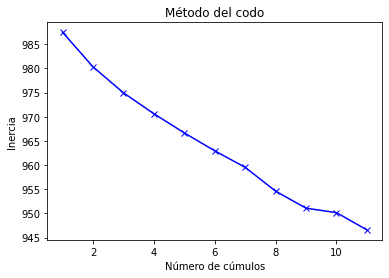

In [17]:
%set_env OMP_NUM_THREADS=8
ks = []
k_inertias = []

for k in range(1,12):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)
    
    
# list(zip(ks,k_inertias))

plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [18]:
k = 8
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,3
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,4
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,2
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,2
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,2
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,2
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,2
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,0


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [19]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()


Cluster # 0
Tiene 428 registros (42.80% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
si regalo foto mando producto buen bonitos pulsera bonita plata aunque compra solo caja mal mejor queda llegó gusta bastante 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** buscaba dos anillos que fuesen a juego y extensibles, para poder llevarlos mi mujer y yo, y me decidí por estos. Llegan super bien presentados en una cajita etc, como presentacion fantásticos. Los anillos son bonitos, no muy grandes, y por la parte de abajo tienen un "corte" y por eso se pueden ajustar a dedos más grandes, nosotros por ejemplo, lo llevamos en el dedo pulgar. Le pongo solo 3 estrellas, porque en menos de 1 semana el anillo de mi mujer ha perdido una piedra, una lástima, porque todo estaba perfecto, si no hubiese caído esta piedra lo hubiera puntuado mejor, pero siendo así, no puedo darle más de eso. Pero bueno, por el precio que es, no los veo nada mal. Espero que las fotos os sirvan de ayuda. Salu2!

 *** Este producto no esta

###  `[BONUS: 3 pts]` Visualización usando PCA

In [20]:
clusters = {0: "Cluster 0 - GUSTO DE JUEGO", 
            1: "Cluster 1 - CALIDAD PRECIO",
            2: "Cluster 2 - PEQUEÑO",
            3: "Cluster 3 - BUEN PRECIO",
            4: "Cluster 4 - ELEGANTE",
            5: "Cluster 5 - PERFECTO ESTADO",
            6: "Cluster 6 - BONITO",
            7: "Cluster 7 - NO HA LLEGADO"
}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.nombres_clusters.values
result['texto'] = data.review_body.apply(lambda val: val[:])

colorsIdx = {
            "Cluster 0 - GUSTO DE JUEGO": "lightyellow", 
            "Cluster 1 - CALIDAD PRECIO": "yellow",
            "Cluster 2 - PEQUEÑO": "lightgreen",
            "Cluster 3 - BUEN PRECIO": "green",
            "Cluster 4 - ELEGANTE": "lightblue",
            "Cluster 5 - PERFECTO ESTADO": "blue",
            "Cluster 6 - BONITO": "lightpink",
            "Cluster 7 - NO HA LLEGADO": "red" }

result['colores'] = result['cluster'].map(colorsIdx)
result

,X,Y,cluster,texto,colores
0,0.486492,-0.316134,Cluster 3 - BUEN PRECIO,"Buen. Buena calidad, y buena presentación.",green
1,-0.106679,-0.150069,Cluster 4 - ELEGANTE,"Un producto a perfecto, para salir de casa con...",lightblue
2,-0.071039,-0.028131,Cluster 0 - GUSTO DE JUEGO,No funciona con Nintendo Switch. No hay forma ...,lightyellow
3,0.031700,0.236130,Cluster 2 - PEQUEÑO,"Recomendado, los utilizo para pc y no me dan n...",lightgreen
4,0.016563,0.098497,Cluster 2 - PEQUEÑO,El cable funciona bien podria ser un poco mas ...,lightgreen
...,...,...,...,...,...
995,0.142354,0.217043,Cluster 2 - PEQUEÑO,En la foto parece que la cadena sea más gruesa...,lightgreen
996,0.276741,0.313369,Cluster 2 - PEQUEÑO,"Bien por su precio, la cadena demasiado fina.",lightgreen
997,0.029917,0.203757,Cluster 2 - PEQUEÑO,Muy bien!! Ahora tengo organizados los pendien...,lightgreen
998,-0.056522,-0.013243,Cluster 0 - GUSTO DE JUEGO,"Las tapas para los joystics no están nada mal,...",lightyellow


In [21]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA - KMEANS")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Comparación

### `[BONUS 15 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [22]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad", "que juego mas malo", 
        "aretes súper bonitos"]
nuevo_trans = tfidf_vect.transform(test)
[clusters[i] for i in model.predict(nuevo_trans)]


['Cluster 6 - BONITO',
 'Cluster 3 - BUEN PRECIO',
 'Cluster 6 - BONITO',
 'Cluster 0 - GUSTO DE JUEGO']

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

- La estructura de los datos es díficil de separar y etiquetar en agrupaciones bien marcadas ya que el cuerpo del texto contiene similitudes de forma y comparte muchos términos en las diferentes clasificaciones.

- El costo computacional de este tipo de modelos de clasificación por agrupación es elevado en comparación con los modelos probados en el taller anterior.

- Las métricas de desempeño no son comparables entre los modelos de clasificación del taller anterior y este modelo ya que este por tener "etiquetado" de grupos define las separaciones de los datos con similitudes en clases, tal como lo define la documentación de la librería Scikit Learn: 

>"Evaluar el rendimiento de un algoritmo de agrupación en clústeres no es tan trivial como contar el número de errores o la precisión y recuperación de un algoritmo de clasificación supervisado. En particular, cualquier métrica de evaluación no debe tener en cuenta los valores absolutos de las etiquetas del clúster, sino más bien si este agrupamiento define separaciones de los datos similares a algún conjunto de clases de verdad fundamental o si satisface alguna suposición de que los miembros pertenecen a la misma clase son más similares que los miembros de diferentes clases de acuerdo con alguna métrica de similitud."